# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import pandas
import numpy as np


#вот здесь начало решения

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [1]:
#среднее
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])



#вот здесь начало решения

for el in data:
    val = data[el].mean()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [1]:
#Медиана
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])



#вот здесь начало решения

for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186441,1.489985,2.283513,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174866,0.919763,1.280091,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [1]:
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val
    
    
    
    
    
#вот здесь начало решения, min-max нормализация

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546610,0.122496,0.320878,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293716,0.229941,0.320023,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val
    
    
    
    
    
#вот здесь начало решения

res = pandas.read_csv('scores.csv')
bro = LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])

[0.24341355 0.26008389 0.15872395 0.22053054]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [2]:
#все посещения

import fileinput
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val
    
    
res = pandas.read_csv('scores.csv')
bro = linear_model.LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])
    
    
#вот здесь начало решения

bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')
for bro in att_data:
    data['attendance_' + str(bro)] = np.array([1 if el == '+' else 0 for el in att_data[bro]])
data['school_support'] = bros
data.describe()

[0.24341355 0.26008389 0.15872395 0.22053054]


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,attendance_23,attendance_24,attendance_25,attendance_26,attendance_27,attendance_28,attendance_29,attendance_30,attendance_31,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546610,0.122496,0.320878,...,0.887519,0.885978,0.910632,0.890601,0.884438,0.88906,0.865948,0.884438,0.898305,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293716,0.229941,0.320023,...,0.316201,0.318083,0.285495,0.312380,0.319946,0.31430,0.340971,0.319946,0.302480,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [1]:
#только количество посещений
import fileinput
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val
    

    
#вот здесь начало решения   

bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')

data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))])


#data['attendance'] = np.array([np.count_nonzero(att_data[el]) for el in att_data])

data['school_support'] = bros
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546610,0.122496,0.320878,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,28.340524,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293716,0.229941,0.320023,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,4.640759,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,26.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546610,0.122496,0.320878,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,28.340524,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293716,0.229941,0.320023,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,4.640759,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,26.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000


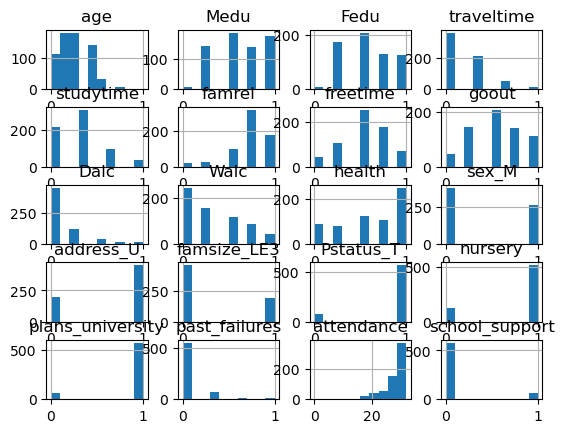

In [1]:
#только количество посещений
import fileinput
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val

bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')

data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))])


#data['attendance'] = np.array([np.count_nonzero(att_data[el]) for el in att_data])

data['school_support'] = bros
data.describe()



#вот здесь начало решения
data.hist()
data.describe()

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

[0.24341355 0.26008389 0.15872395 0.22053054]
Mean squared error: 222.93


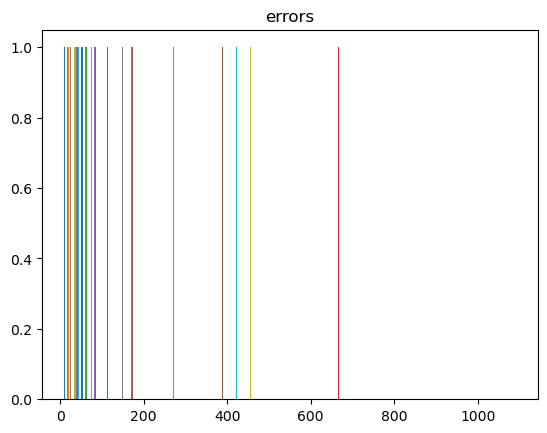

In [1]:
#только количество посещений + min-max нормализация
import fileinput
import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val
    
#!!!!!!!!!!!!!!!!!НОРМАЛИЗАЦИЯ

for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val
    
    
res = pandas.read_csv('scores.csv')
bro = linear_model.LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])


bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')

data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))])


#data['attendance'] = np.array([np.count_nonzero(att_data[el]) for el in att_data])

data['school_support'] = bros
data.describe()

#data.hist()
#data.describe()



#вот здесь начало решения (реализация с min-max нормализацией)

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], res.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

%matplotlib inline


errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

[0.24341355 0.26008389 0.15872395 0.22053054]
Mean squared error: 222.93


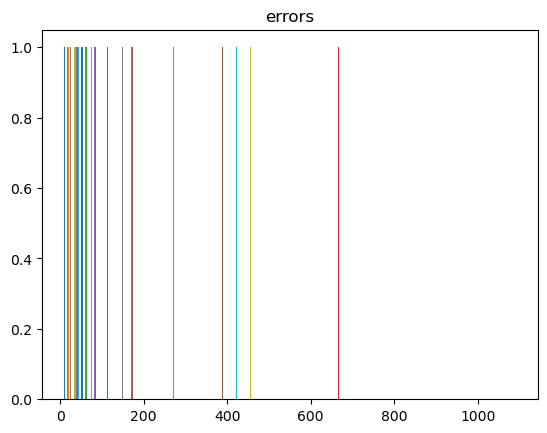

In [1]:
#только количество посещений + mean-нормализация
import fileinput
import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val
    
for el in data:
    val = data[el].std()
    data[el]=(data[el] - data[el].mean()) / val
    
res = pandas.read_csv('scores.csv')
bro = linear_model.LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])


bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')

data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))])


#data['attendance'] = np.array([np.count_nonzero(att_data[el]) for el in att_data])

data['school_support'] = bros
data.describe()

#data.hist()
#data.describe()



#вот здесь начало решения (реализация с mean нормализация)

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], res.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

%matplotlib inline


errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

[0.24341355 0.26008389 0.15872395 0.22053054]
Mean squared error: 234.25


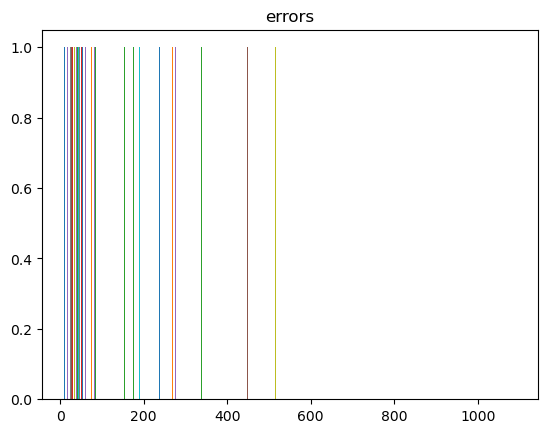

In [1]:
#все посещения + min-max нормализация

import fileinput
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

    
#min-max нормализация
for el in data:
    val = data[el].max() - data[el].min()
    data[el] = (data[el] - data[el].min()) / val
    
    
res = pandas.read_csv('scores.csv')
bro = linear_model.LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])


bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')
for bro in att_data:
    data['attendance_' + str(bro)] = np.array([1 if el == '+' else 0 for el in att_data[bro]])
data['school_support'] = bros
data.describe()



#вот здесь начало решения


x_train, x_test, y_train, y_test = train_test_split(data.values[1:], res.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

%matplotlib inline


errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()



[0.24341355 0.26008389 0.15872395 0.22053054]
Mean squared error: 234.25


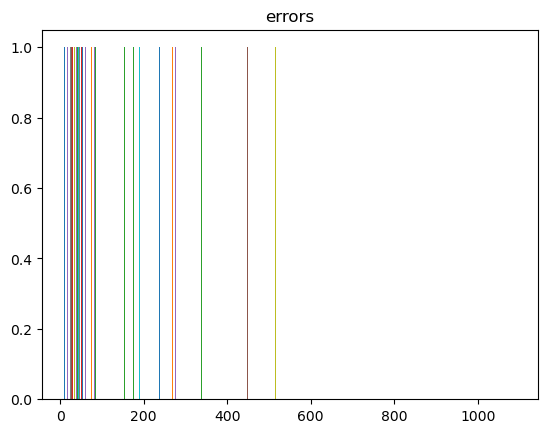

In [1]:
#все посещения + mean-нормализация

import fileinput
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas
import numpy as np

def fix(i):
    if i < 15:
        return 1
    elif i < 30:
        return 2
    elif i < 60:
        return 3
    else:
        return 4
    
bro = str("123")
exit()

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

# 1. признаки plans_universitypast_failures и plans_university склеены, так что исправим это
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = np.array([abs(i) % 10 for i in data['plans_university']])
data['plans_university'] = np.array([int(str(i)[:-1]) for i in data['plans_university']])

# 2. нужно исправить age, ибо среди данных есть годы рождения
data['age'] = np.array([2006 - i if i > 101 else i for i in data['age']])

# 3. у некоторых признак traveltime не указан корретно(>4)
data['traveltime'] = np.array([i if i <= 4 else fix(i) for i in data['traveltime']])
for el in data:
    val = data[el].median()
    bro = pandas.isnull(data[el])
    data.loc[bro, el] = val

    
    
#mean-нормализация
for el in data:
    val = data[el].std()
    data[el]=(data[el] - data[el].mean()) / val
    
    
res = pandas.read_csv('scores.csv')
bro = linear_model.LinearRegression()
ans = cross_validate(bro, data.values[1:], res.values, cv=4)
print(ans['test_score'])


bros = np.zeros(649)
for line in fileinput.input('school_support.txt'):
    l = int(line.rstrip())
    bros[l - 1] = 1

att_data = pandas.read_csv('attendance.csv', delimiter=';')
for bro in att_data:
    data['attendance_' + str(bro)] = np.array([1 if el == '+' else 0 for el in att_data[bro]])
data['school_support'] = bros
data.describe()



#вот здесь начало решения


x_train, x_test, y_train, y_test = train_test_split(data.values[1:], res.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

%matplotlib inline


errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()



### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
После запусков с разными способами нормализации данных(min-max и mean нормализации) видно, что замена mean нормализации на
min-max нормализацию никак не изменило среднеквадратичную ошибку. При замене таблицы с количеством посещений на таблицу со всеми
посещениями среднеквадратичная ошибка увеличилась, что довольно-таки ожидаемо.
В последних заданиях просил очень много помощи у Дениса Тугова и Антона Ныйкина, спасибо им за это большое! Почему-то я не мог
компилировать куски кода последовательно (писало что ядро умирало), поэтому пришлось постоянно всё копировать.